In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score

#Малые для ансамблей
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Ансамбли
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


#https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=test.csv
pd.set_option('display.max_columns', None) 

In [2]:
#Импорт фрейма данных
data = pd.read_csv('credit_score\data.csv')
data

C:\Users\Adept\AppData\Local\Temp\ipykernel_3244\2224456484.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('credit_score\data.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df = data

#Удаление не нужных столбцов
for i in ('ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan', "Num_Credit_Card", "Num_of_Loan", "Changed_Credit_Limit"):
    df = df.drop(i, axis=1)

#Числовая классификация и замена категориальных признаков-числовыми
df.loc[df["Credit_Score"] == 'Poor', "Credit_Score"] = 0
df.loc[df["Credit_Score"] == 'Standard', "Credit_Score"] = 1
df.loc[df["Credit_Score"] == 'Good', "Credit_Score"] = 1
df['Credit_Score'] = df['Credit_Score'].astype (int)

df.loc[df["Payment_of_Min_Amount"] == 'NM', "Payment_of_Min_Amount"] = 0
df.loc[df["Payment_of_Min_Amount"] == 'No', "Payment_of_Min_Amount"] = 1
df.loc[df["Payment_of_Min_Amount"] == 'Yes', "Payment_of_Min_Amount"] = 2

df1 = pd.get_dummies(df['Occupation'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Occupation', axis=1, inplace=True)

df1 = pd.get_dummies(df['Credit_Mix'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Credit_Mix', axis=1, inplace=True)

df1 = pd.get_dummies(df['Payment_Behaviour'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Payment_Behaviour', axis=1, inplace=True)


df['Credit_History_Age'] = df['Credit_History_Age'].str.extract('(\d+)').astype(float)
df['Age'] = df['Age'].str.extract('(\d+)').astype(int)
df['Annual_Income'] = df['Annual_Income'].str.extract('(\d+)').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.extract('(\d+)').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.extract('(\d+)').astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].str.extract('(\d+)').astype(float)

#замена пропусков нулями
df.fillna(0, inplace=True)

df


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______,Bad,Good,Standard,_,!@9#%8,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,23,19114.0,1824.843333,3,3,3,7.0,4.0,809.0,26.822620,22.0,1,49.574949,80.0,312.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,23,19114.0,0.000000,3,3,-1,0.0,4.0,809.0,31.944960,0.0,1,49.574949,118.0,284.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,500,19114.0,0.000000,3,3,3,7.0,4.0,809.0,28.609352,22.0,1,49.574949,81.0,331.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,23,19114.0,0.000000,3,3,5,4.0,4.0,809.0,31.377862,22.0,1,49.574949,199.0,223.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,23,19114.0,1824.843333,3,3,6,0.0,4.0,809.0,24.797347,22.0,1,49.574949,41.0,341.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.0,3359.415833,4,7,23,7.0,3.0,502.0,34.663572,31.0,1,35.104023,60.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
99996,25,39628.0,3359.415833,4,7,18,7.0,3.0,502.0,40.565631,31.0,1,35.104023,54.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
99997,25,39628.0,3359.415833,4,5729,27,6.0,3.0,502.0,41.255522,31.0,1,35.104023,24.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
99998,25,39628.0,3359.415833,4,7,20,0.0,3.0,502.0,33.638208,31.0,1,35.104023,251.0,0.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [4]:
df = pd.get_dummies(df)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______,Bad,Good,Standard,_,!@9#%8,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Payment_of_Min_Amount_0,Payment_of_Min_Amount_1,Payment_of_Min_Amount_2
0,23,19114.0,1824.843333,3,3,3,7.0,4.0,809.0,26.822620,22.0,49.574949,80.0,312.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
1,23,19114.0,0.000000,3,3,-1,0.0,4.0,809.0,31.944960,0.0,49.574949,118.0,284.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,500,19114.0,0.000000,3,3,3,7.0,4.0,809.0,28.609352,22.0,49.574949,81.0,331.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,23,19114.0,0.000000,3,3,5,4.0,4.0,809.0,31.377862,22.0,49.574949,199.0,223.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
4,23,19114.0,1824.843333,3,3,6,0.0,4.0,809.0,24.797347,22.0,49.574949,41.0,341.0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.0,3359.415833,4,7,23,7.0,3.0,502.0,34.663572,31.0,35.104023,60.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
99996,25,39628.0,3359.415833,4,7,18,7.0,3.0,502.0,40.565631,31.0,35.104023,54.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
99997,25,39628.0,3359.415833,4,5729,27,6.0,3.0,502.0,41.255522,31.0,35.104023,24.0,0.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
99998,25,39628.0,3359.415833,4,7,20,0.0,3.0,502.0,33.638208,31.0,35.104023,251.0,0.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [84]:
#Поиск неправильных форматов данных в столбцах
df[(df.values.ravel() == "__-333333333333333333333333333__").reshape(df.shape).any(1)]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______,Bad,Good,Standard,_,!@9#%8,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments


count    100000.000000
mean       3564.961339
std        3295.207286
min           0.000000
25%        1183.864167
50%        2623.714167
75%        5371.525000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


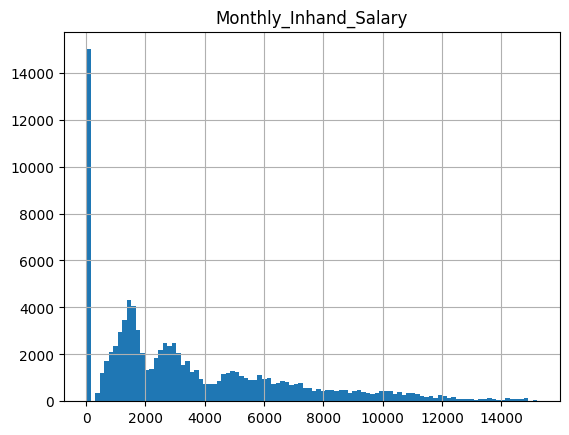

In [21]:
plot = df.hist(df.select_dtypes(include='number').columns[2], bins=100)
print(df[df.select_dtypes(include='number').columns[2]].describe())

In [15]:
col_num = 5
df[df.select_dtypes(include='number').columns[col_num]].value_counts(dropna=False)

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

Age - 0%
Annual_Income - 0%
Monthly_Inhand_Salary - 0%
Num_Bank_Accounts - 0%
Interest_Rate - 0%
Delay_from_due_date - 0%
Num_of_Delayed_Payment - 0%
Num_Credit_Inquiries - 0%
Outstanding_Debt - 0%
Credit_Utilization_Ratio - 0%
Credit_History_Age - 0%
Payment_of_Min_Amount - 0%
Total_EMI_per_month - 0%
Amount_invested_monthly - 0%
Monthly_Balance - 0%
Credit_Score - 0%
Accountant - 0%
Architect - 0%
Developer - 0%
Doctor - 0%
Engineer - 0%
Entrepreneur - 0%
Journalist - 0%
Lawyer - 0%
Manager - 0%
Mechanic - 0%
Media_Manager - 0%
Musician - 0%
Scientist - 0%
Teacher - 0%
Writer - 0%
_______ - 0%
Bad - 0%
Good - 0%
Standard - 0%
_ - 0%
!@9#%8 - 0%
High_spent_Large_value_payments - 0%
High_spent_Medium_value_payments - 0%
High_spent_Small_value_payments - 0%
Low_spent_Large_value_payments - 0%
Low_spent_Medium_value_payments - 0%
Low_spent_Small_value_payments - 0%


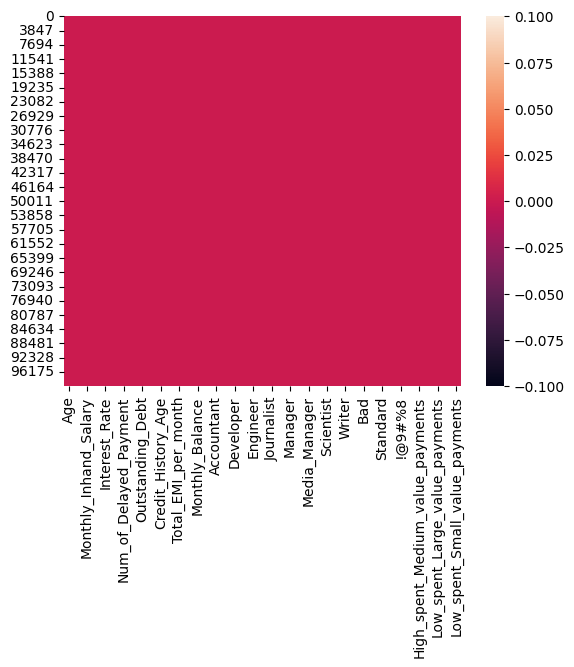

In [6]:
# Проверка на пропущенные данные: желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df[df.columns[:]].isnull())
for col in df.columns:
    print(f"{col} - {round(np.mean(df[col].isnull())*100)}%")

In [10]:
#Разделение на обучующую и тестовую выборки 
train, test = np.split(df.sample(frac=1, random_state=42), [ int(.8*len(df))])
TRNtrain, TARtrain = train.drop('Credit_Score', axis=1), train['Credit_Score']
TRNtest, TARtest = test.drop('Credit_Score', axis=1), test['Credit_Score']

In [109]:
#Подбираем малые модели для дальнейшего голосования 
models = []
#models.append(svm.SVC(kernel='linear', random_state=1))
models.append(ExtraTreesClassifier(max_depth=11, min_samples_leaf=8, n_estimators=6, random_state=1))
models.append(RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3, n_estimators=8, random_state=1))
models.append(GaussianNB())
models.append(LogisticRegression(max_iter=26, random_state=1, solver='newton-cg'))
models.append(KNeighborsClassifier(leaf_size=1, n_neighbors=14))
models.append(LinearDiscriminantAnalysis())
models.append(QuadraticDiscriminantAnalysis())
models.append(DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5, random_state=1))

In [110]:
for model in models:
    model.fit(TRNtrain, TARtrain)

n:\Для Артема\.venv\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
n:\Для Артема\.venv\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
n:\Для Артема\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


n:\Для Артема\.venv\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
n:\Для Артема\.venv\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
n:\Для Артема\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


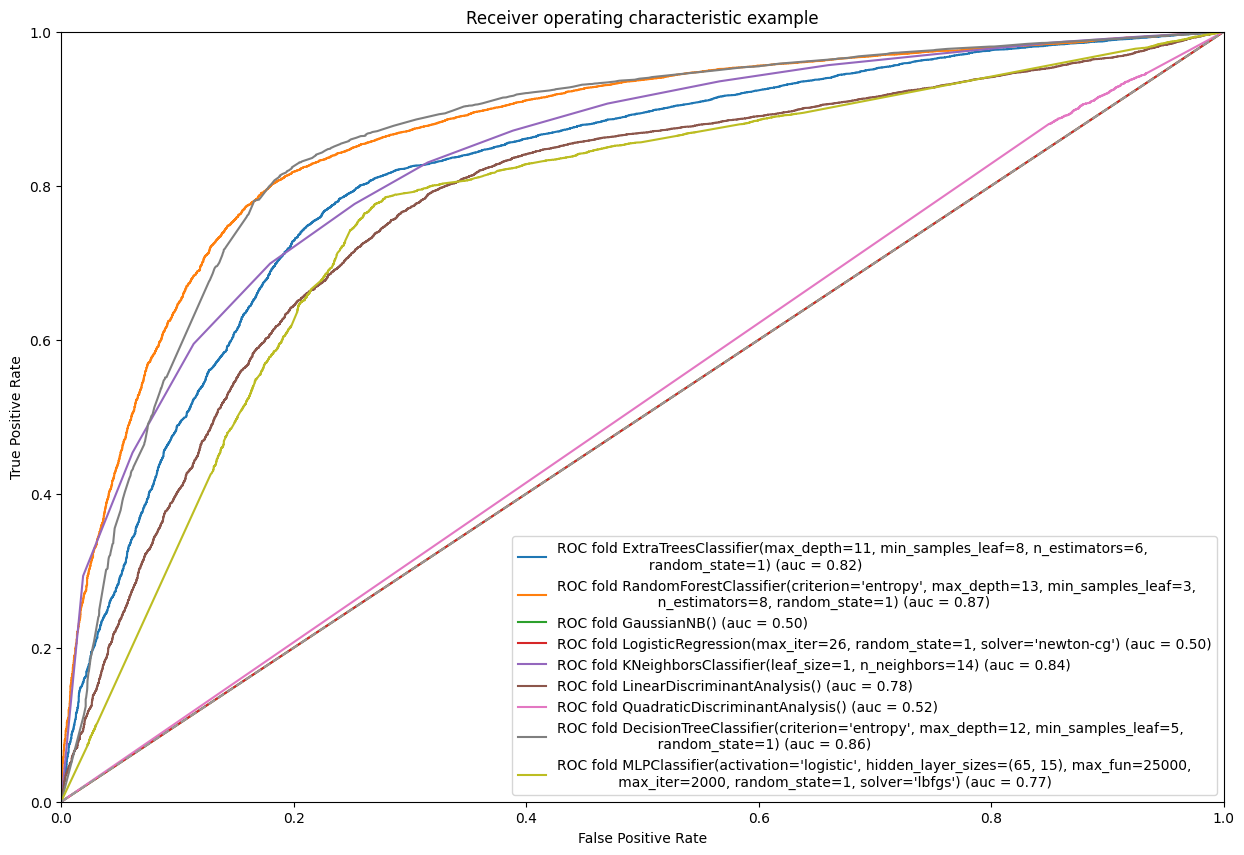

In [111]:
plt.figure(figsize=(15, 10)) 
for model in models:
    model.fit(TRNtrain, TARtrain)

    pred_scr = model.predict_proba(TRNtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(TARtest, pred_scr)
    roc_auc = roc_auc_score(TARtest, pred_scr)

    md = str(model)[:str(model).find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (str(model), roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
estimators = [('dt', DecisionTreeClassifier(criterion='entropy', random_state=1)),
              ('etc', ExtraTreesClassifier(random_state=1)),
              ('rfc', RandomForestClassifier(criterion='entropy', random_state=1)),
              ('knn', KNeighborsClassifier(leaf_size=1, n_neighbors=14))
            ]

ensemble_models = []
ensemble_models.append(AdaBoostClassifier(estimator=(estimators[2])[1],n_estimators=150, random_state=1))
ensemble_models.append(BaggingClassifier(estimator=(estimators[0])[1], random_state=24))
ensemble_models.append(GradientBoostingClassifier(random_state=1,n_estimators=150, max_depth=10, min_samples_leaf=7))
ensemble_models.append(StackingClassifier(estimators=estimators))
ensemble_models.append(HistGradientBoostingClassifier(random_state=1, max_iter=300, max_depth=12, min_samples_leaf=10))
ensemble_models.append(ExtraTreesClassifier(max_depth=11, min_samples_leaf=8, n_estimators=6, random_state=1))
ensemble_models.append(RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3, n_estimators=8, random_state=1))
ensemble_models.append(VotingClassifier(estimators=estimators, voting='soft'))

In [27]:
results = ""
for ensemble in ensemble_models:
    ensemble.fit(TRNtrain, TARtrain)
    acc = accuracy_score(TARtest, ensemble.predict(TRNtest))
    pre = precision_score(TARtest, ensemble.predict(TRNtest))
    results+=(f"{str(ensemble)[0:10]}: {acc}; {pre}\n")

print(results)

AdaBoostCl: 0.86285; 0.8957234101638434
BaggingCla: 0.8694; 0.91583122971511
GradientBo: 0.8653; 0.897783336807727
StackingCl: 0.86345; 0.8949882320365499
HistGradie: 0.84365; 0.8801766979569299
ExtraTrees: 0.7829; 0.8284737582947919
RandomFore: 0.8211; 0.8606048194416
VotingClas: 0.84995; 0.8781050631193159



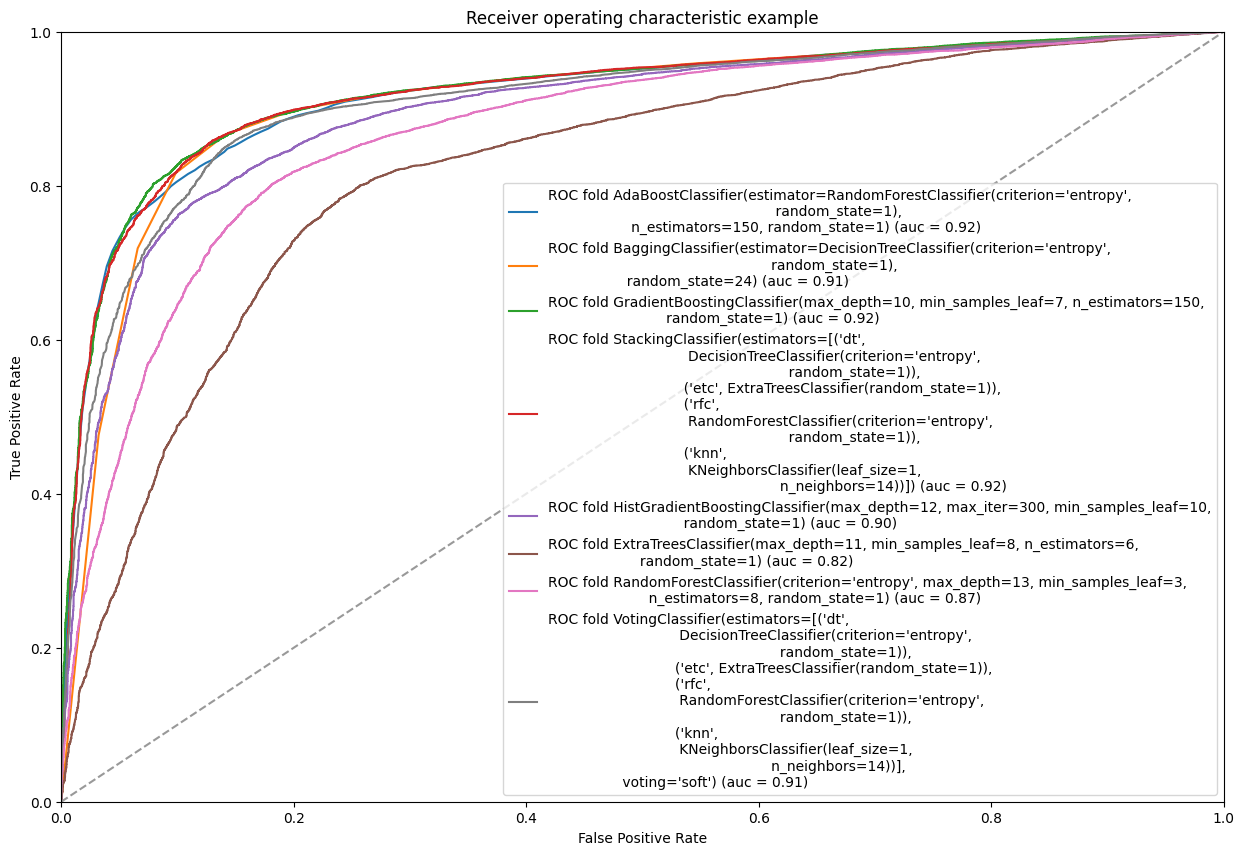

In [28]:
plt.figure(figsize=(15, 10)) 
for model in ensemble_models:
    model.fit(TRNtrain, TARtrain)

    pred_scr = model.predict_proba(TRNtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(TARtest, pred_scr)
    roc_auc = roc_auc_score(TARtest, pred_scr)

    md = str(model)[:str(model).find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (str(model), roc_auc))
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AdaBoostCl: 0.86285; 0.8957234101638434
BaggingCla: 0.8694; 0.91583122971511
GradientBo: 0.8653; 0.897783336807727
StackingCl: 0.86345; 0.8949882320365499
HistGradie: 0.84365; 0.8801766979569299
ExtraTrees: 0.7829; 0.8284737582947919
RandomFore: 0.8211; 0.8606048194416
VotingClas: 0.84995; 0.8781050631193159



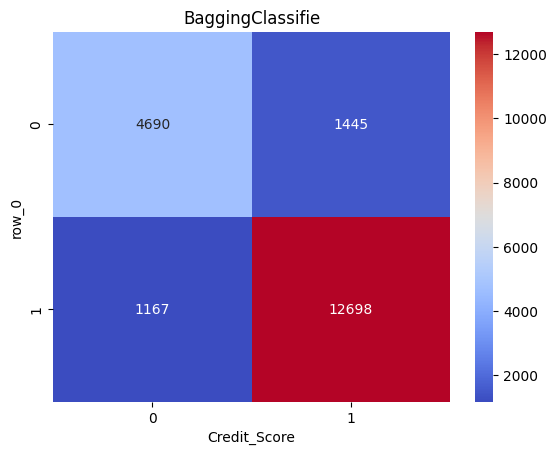

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
num = 1
ct = pd.crosstab(ensemble_models[num].predict(TRNtest), TARtest)
print(results)
sns.heatmap(ct, annot=True, fmt="d", cmap='coolwarm')
plt.title(str(ensemble_models[num])[0:16])
plt.show()